In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

# Load the dataset
data = pd.read_csv('letters.csv')

In [11]:
print(data.head())
print("Shape:",data.shape)
print(data.describe)

   label  pixel43  pixel44  pixel92  pixel124  pixel125  pixel126  pixel127  \
0      1        0        0        0         0         0         0         0   
1      0        0        0        0       137       137       192        86   
2      1        0        0        0         3       141       139         3   
3      4        0        0        0         0         0         0         0   
4      0        0        0        0       155       254       254       254   

   pixel128  pixel129  ...  pixel329  pixel351  pixel410  pixel411  pixel412  \
0         0         0  ...         0       254         0         0         0   
1        72         1  ...       254         0         0        75       254   
2         0         0  ...         0       184         0         0         0   
3         0         0  ...         0         0        94       255        69   
4       157        30  ...       253         0         0         0       223   

   pixel413  pixel414  pixel415  pixel416  p

In [12]:
# Split data into features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = knn.predict(X_test_scaled)

y_pred


array([0, 1, 0, ..., 7, 3, 5], dtype=int64)

In [18]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the KNN model (KNN):', accuracy)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Display classification report
cr = classification_report(y_test, y_pred)
print('Classification Report:\n', cr)

Accuracy of the KNN model (KNN): 0.6238095238095238
Confusion Matrix:
 [[753   2  25   5  10   9  25  13   9  10]
 [  0 911   5   7  16   9   5   1  12   5]
 [ 61  33 506  79  20  10  13  24  49  22]
 [ 17  27 131 432  20  66   4  20  91  26]
 [ 28  67  23  19 430  33  20 105  13  64]
 [  7  34  36 109  38 400  34  28  25  33]
 [ 30  20  18  12  16  12 706   0   7   0]
 [ 15  12  33  30 140  52   0 407  10 215]
 [ 25  82 100 101  22  46  16  21 358  18]
 [ 30  15  34  54  99  35   1 225  17 337]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       861
           1       0.76      0.94      0.84       971
           2       0.56      0.62      0.59       817
           3       0.51      0.52      0.51       834
           4       0.53      0.54      0.53       802
           5       0.60      0.54      0.56       744
           6       0.86      0.86      0.86       821
           7       0.48      0.45      0.

In [19]:
# Cross-validation
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', np.mean(cv_scores))

Cross-validation scores: [0.62142857 0.61607143 0.61309524 0.61488095 0.62440476]
Average cross-validation score: 0.6179761904761906


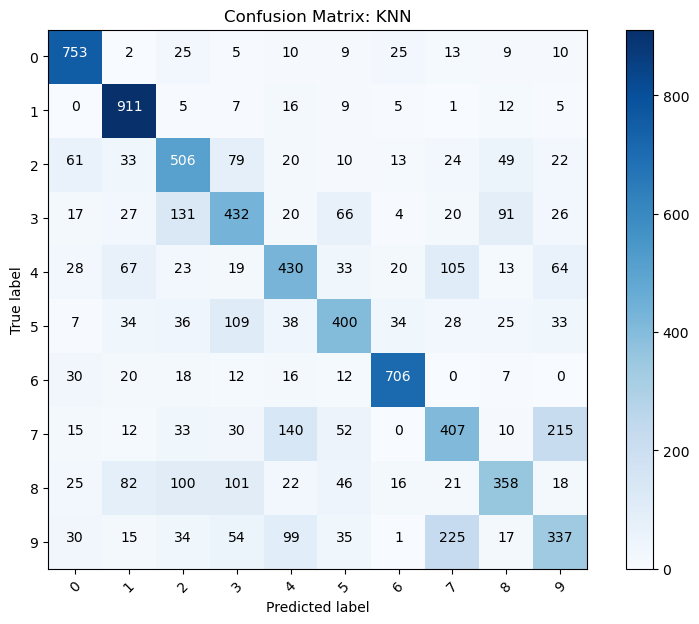

In [20]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix: KNN')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.grid(False)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()
